In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

Subir y mostrar dataset

In [5]:
df = pd.read_csv("Myocardial infarction complications.csv")
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77,0,0,4,2,1,?,2,0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70,0,0,6,2,1,?,2,0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55,1,3,6,2,2,?,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79,0,2,2,2,1,?,2,0,...,0,0,0,1,0,0,0,0,0,1


Se elimina la variable ID, se remmplazan los datos vacíos por NaN y calcula la cantidad de datos faltantes del dataset por columna.

In [6]:
df = df.drop(['ID'], axis=1)
df.replace('?', np.nan, inplace=True)
def total_null(df):
    tot = []
    for val in df.isnull().sum():
        tot.append(val)
        cantidad_nan_columna = { k : v for k,v in zip(df.columns, tot)}

    return cantidad_nan_columna
cantidad_nan_columna =  total_null(df)
print(cantidad_nan_columna)

{'AGE': 8, 'SEX': 0, 'INF_ANAM': 4, 'STENOK_AN': 106, 'FK_STENOK': 73, 'IBS_POST': 51, 'IBS_NASL': 1628, 'GB': 9, 'SIM_GIPERT': 8, 'DLIT_AG': 248, 'ZSN_A': 54, 'nr11': 21, 'nr01': 21, 'nr02': 21, 'nr03': 21, 'nr04': 21, 'nr07': 21, 'nr08': 21, 'np01': 18, 'np04': 18, 'np05': 18, 'np07': 18, 'np08': 18, 'np09': 18, 'np10': 18, 'endocr_01': 11, 'endocr_02': 10, 'endocr_03': 10, 'zab_leg_01': 7, 'zab_leg_02': 7, 'zab_leg_03': 7, 'zab_leg_04': 7, 'zab_leg_06': 7, 'S_AD_KBRIG': 1076, 'D_AD_KBRIG': 1076, 'S_AD_ORIT': 267, 'D_AD_ORIT': 267, 'O_L_POST': 12, 'K_SH_POST': 15, 'MP_TP_POST': 14, 'SVT_POST': 12, 'GT_POST': 12, 'FIB_G_POST': 12, 'ant_im': 83, 'lat_im': 80, 'inf_im': 80, 'post_im': 72, 'IM_PG_P': 1, 'ritm_ecg_p_01': 152, 'ritm_ecg_p_02': 152, 'ritm_ecg_p_04': 152, 'ritm_ecg_p_06': 152, 'ritm_ecg_p_07': 152, 'ritm_ecg_p_08': 152, 'n_r_ecg_p_01': 115, 'n_r_ecg_p_02': 115, 'n_r_ecg_p_03': 115, 'n_r_ecg_p_04': 115, 'n_r_ecg_p_05': 115, 'n_r_ecg_p_06': 115, 'n_r_ecg_p_08': 115, 'n_r_ecg_p

Se calcula la cantidad total de datos faltantes y la cantidad de datos mímina que debería tener cada columna

In [7]:
cantidad_total_faltantes = 0
for val in cantidad_nan_columna.values():
    cantidad_total_faltantes = cantidad_total_faltantes + val
porcente_max = 1700*.3


print(f" cantidad total de datos faltantes: {cantidad_total_faltantes} cantidad maxima de perdidad por columna: {porcente_max}")

 cantidad total de datos faltantes: 15974 cantidad maxima de perdidad por columna: 510.0


Se crea una lista con las columnas a eliminar que no cumplen con la cantidad de datos por columna, luego se muestra graficamente la cantidad de datos por columna.

['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NA_KB', 'NOT_NA_KB', 'LID_KB']


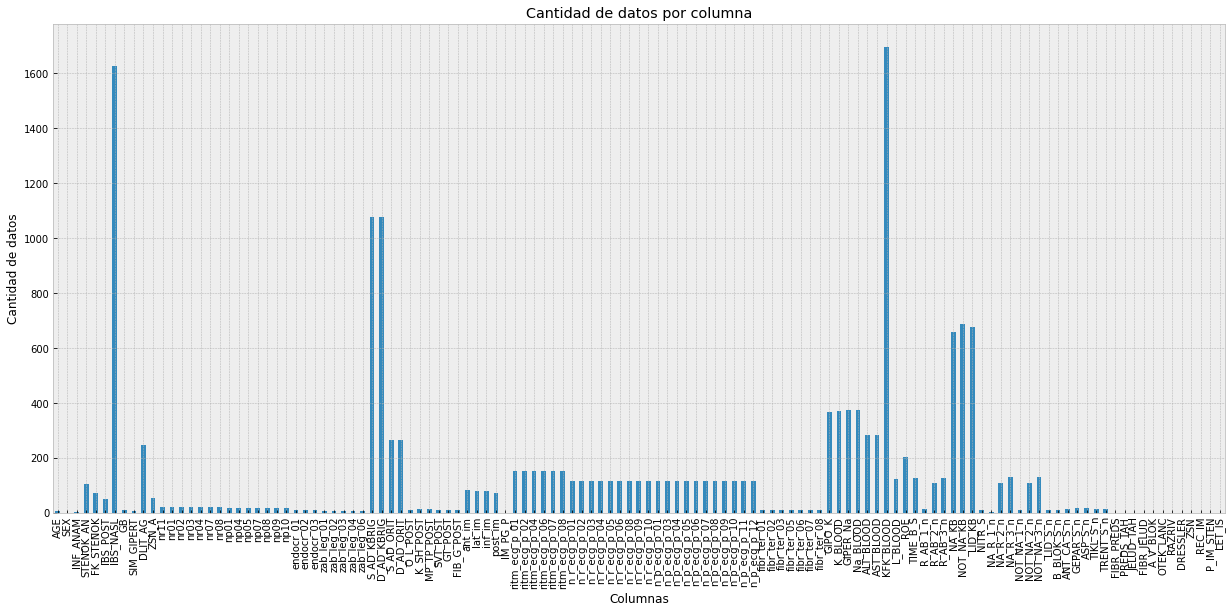

In [8]:
columnas_a_eliminar = [col for col in  cantidad_nan_columna if  cantidad_nan_columna.get(col) >= porcente_max]
print(columnas_a_eliminar)
cantidad_nan = pd.DataFrame.from_dict(cantidad_nan_columna, orient='index', columns=['count'])

# Graficamos el DataFrame
cantidad_nan.plot(kind='bar', figsize=(21, 9), legend=None)
plt.title('Cantidad de datos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de datos')
plt.show()

Se eliminan las columnas y se eliminan las filas y se completan los datos con la moda y la mediana

In [9]:
df = df.drop(columns = columnas_a_eliminar)
def getDataSet(data_set,n):
    data_set=data_set.dropna(thresh=df.shape[1]-n)
    data_set = data_set.fillna(data_set.median(numeric_only=True)) 
    categorical_cols = data_set.select_dtypes(include='object').columns.tolist()
    for col in categorical_cols:
        data_set[col].fillna(data_set[col].mode()[0], inplace=True)
    return data_set

df_29 =getDataSet(df,29)
df_35 =getDataSet(df,35)
df_29

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,77,0,0,0,0,0,2,0,7,0,...,0,0,0,0,1,0,0,0,0,3
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [10]:
df_35

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1697,55,1,3,6,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [11]:
df_29.info()
print('\n------------\n')
df_35.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB

------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB


Se valida que ya no hay datos nulos 

In [12]:
print(total_null(df_29))
print('------------')
print(total_null(df_35))

{'AGE': 0, 'SEX': 0, 'INF_ANAM': 0, 'STENOK_AN': 0, 'FK_STENOK': 0, 'IBS_POST': 0, 'GB': 0, 'SIM_GIPERT': 0, 'DLIT_AG': 0, 'ZSN_A': 0, 'nr11': 0, 'nr01': 0, 'nr02': 0, 'nr03': 0, 'nr04': 0, 'nr07': 0, 'nr08': 0, 'np01': 0, 'np04': 0, 'np05': 0, 'np07': 0, 'np08': 0, 'np09': 0, 'np10': 0, 'endocr_01': 0, 'endocr_02': 0, 'endocr_03': 0, 'zab_leg_01': 0, 'zab_leg_02': 0, 'zab_leg_03': 0, 'zab_leg_04': 0, 'zab_leg_06': 0, 'S_AD_ORIT': 0, 'D_AD_ORIT': 0, 'O_L_POST': 0, 'K_SH_POST': 0, 'MP_TP_POST': 0, 'SVT_POST': 0, 'GT_POST': 0, 'FIB_G_POST': 0, 'ant_im': 0, 'lat_im': 0, 'inf_im': 0, 'post_im': 0, 'IM_PG_P': 0, 'ritm_ecg_p_01': 0, 'ritm_ecg_p_02': 0, 'ritm_ecg_p_04': 0, 'ritm_ecg_p_06': 0, 'ritm_ecg_p_07': 0, 'ritm_ecg_p_08': 0, 'n_r_ecg_p_01': 0, 'n_r_ecg_p_02': 0, 'n_r_ecg_p_03': 0, 'n_r_ecg_p_04': 0, 'n_r_ecg_p_05': 0, 'n_r_ecg_p_06': 0, 'n_r_ecg_p_08': 0, 'n_r_ecg_p_09': 0, 'n_r_ecg_p_10': 0, 'n_p_ecg_p_01': 0, 'n_p_ecg_p_03': 0, 'n_p_ecg_p_04': 0, 'n_p_ecg_p_05': 0, 'n_p_ecg_p_06': 0,

In [13]:
df_29.describe()

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,0.627047,0.101273,0.011522,0.024864,0.042450,0.032141,0.092784,0.032747,0.044876,0.232868,0.090964,0.084294,0.471801
std,0.483737,0.301782,0.106753,0.155756,0.201675,0.176427,0.290217,0.178028,0.207094,0.422787,0.287645,0.277912,1.377467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [14]:
df_35.describe()

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,0.626257,0.100532,0.011827,0.024837,0.041987,0.033708,0.094027,0.031934,0.044352,0.232407,0.094027,0.086931,0.474276
std,0.483940,0.300797,0.108140,0.155675,0.200619,0.180530,0.291953,0.175876,0.205938,0.422492,0.291953,0.281817,1.382398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [15]:
df_numeric_29 = df_29.select_dtypes(include='number') # obteniendo las columnas con valores númericos
df_numeric_29.head(10)

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
df_numeric_35 = df_35.select_dtypes(include='number') # obteniendo las columnas con valores númericos
df_numeric_35.head(10)

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


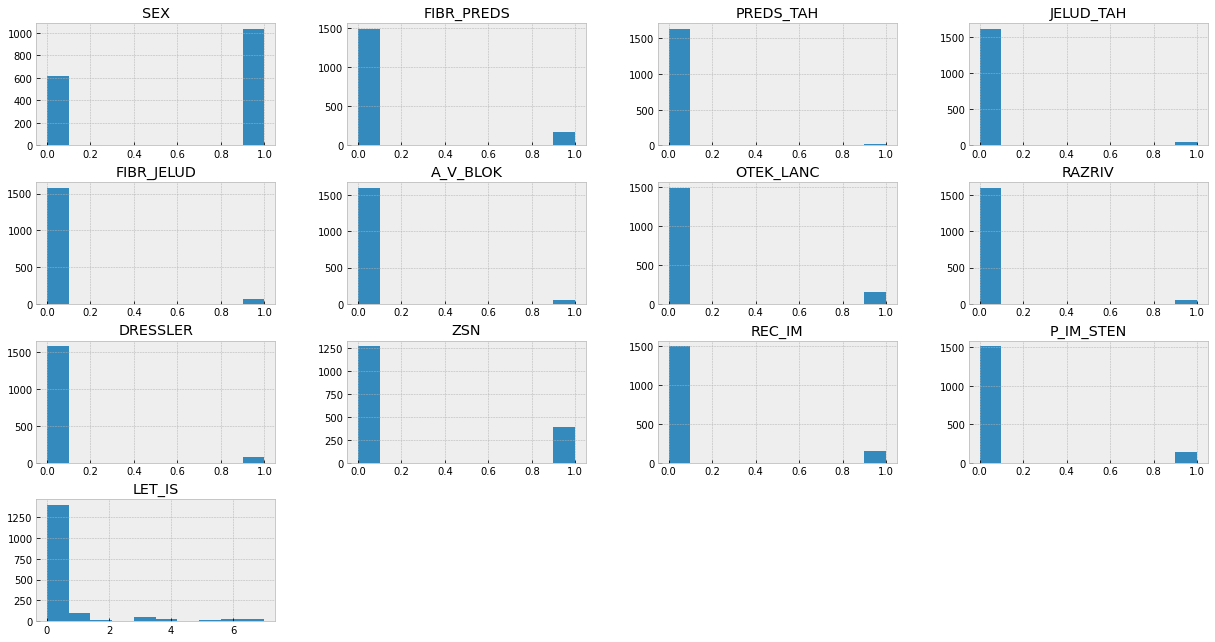

In [17]:

plt.rcParams['figure.figsize'] = (21, 11) # tamaño de las graficas
plt.style.use('bmh')
df_numeric_29.hist()
plt.show()

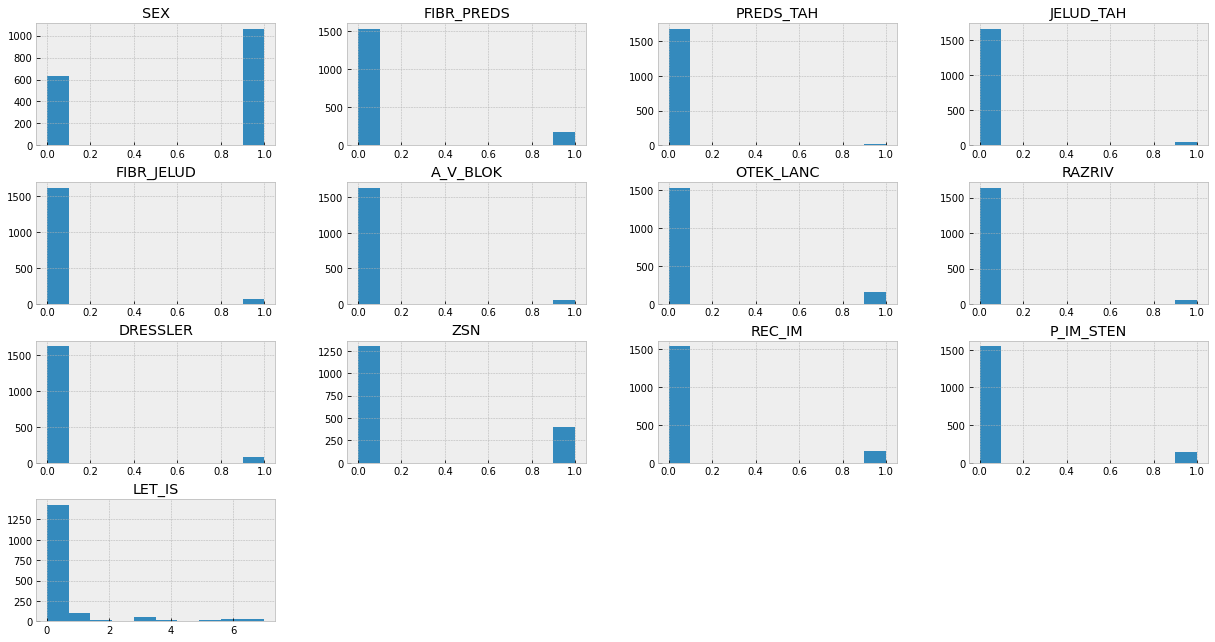

In [18]:
plt.rcParams['figure.figsize'] = (21, 11) # tamaño de las graficas
plt.style.use('bmh')
df_numeric_35.hist()
plt.show()

In [19]:
print(df_29.groupby("ZSN").size())
print(df_35.groupby("ZSN").size())

ZSN
0    1265
1     384
dtype: int64
ZSN
0    1298
1     393
dtype: int64


In [22]:
caracteristicas=list(df_29)
print(caracteristicas)

Xn_29=df_29.drop(["ZSN"],axis=1)
yn_29=df_29["ZSN"]
caracteristicas=list(Xn_29)
print(caracteristicas)
Xn_29

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_te

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,77,0,0,0,0,0,2,0,7,0,...,0,0,0,0,0,1,0,0,0,3
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,0,1,0,1,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
caracteristicas=list(df_35)
print(caracteristicas)

Xn_35=df_35.drop(["ZSN"],axis=1)
yn_35=df_35["ZSN"]
caracteristicas=list(Xn_35)
print(caracteristicas)
Xn_35

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr11', 'nr01', 'nr02', 'nr03', 'nr04', 'nr07', 'nr08', 'np01', 'np04', 'np05', 'np07', 'np08', 'np09', 'np10', 'endocr_01', 'endocr_02', 'endocr_03', 'zab_leg_01', 'zab_leg_02', 'zab_leg_03', 'zab_leg_04', 'zab_leg_06', 'S_AD_ORIT', 'D_AD_ORIT', 'O_L_POST', 'K_SH_POST', 'MP_TP_POST', 'SVT_POST', 'GT_POST', 'FIB_G_POST', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P', 'ritm_ecg_p_01', 'ritm_ecg_p_02', 'ritm_ecg_p_04', 'ritm_ecg_p_06', 'ritm_ecg_p_07', 'ritm_ecg_p_08', 'n_r_ecg_p_01', 'n_r_ecg_p_02', 'n_r_ecg_p_03', 'n_r_ecg_p_04', 'n_r_ecg_p_05', 'n_r_ecg_p_06', 'n_r_ecg_p_08', 'n_r_ecg_p_09', 'n_r_ecg_p_10', 'n_p_ecg_p_01', 'n_p_ecg_p_03', 'n_p_ecg_p_04', 'n_p_ecg_p_05', 'n_p_ecg_p_06', 'n_p_ecg_p_07', 'n_p_ecg_p_08', 'n_p_ecg_p_09', 'n_p_ecg_p_10', 'n_p_ecg_p_11', 'n_p_ecg_p_12', 'fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_te

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,0,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,0,1,0,1,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1697,55,1,3,6,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
XTrain_29,XTest_29,yTrain_29,yTest_29=train_test_split(Xn_29,yn_29,test_size=0.2,random_state=5)
XTrain_35,XTest_35,yTrain_35,yTest_35=train_test_split(Xn_35,yn_35,test_size=0.2,random_state=5)

In [27]:
modelo_29=DecisionTreeClassifier(max_depth=3)
modelo_29.fit(XTrain_29,yTrain_29)
yPredict_29=modelo_29.predict(XTrain_29)
print("Train Accuracy ",metrics.accuracy_score(yTrain_29,yPredict_29))
yPredict_29=modelo_29.predict(XTest_29)
print("Test Accuracy ",metrics.accuracy_score(yTest_29,yPredict_29))
print("\n----------------------------\n")
modelo_35=DecisionTreeClassifier(max_depth=3)
modelo_35.fit(XTrain_35,yTrain_35)
yPredict_35=modelo_35.predict(XTrain_35)
print("Train Accuracy ",metrics.accuracy_score(yTrain_35,yPredict_35))
yPredict_35=modelo_35.predict(XTest_35)
print("Test Accuracy ",metrics.accuracy_score(yTest_35,yPredict_35))

Train Accuracy  0.824109173616376
Test Accuracy  0.7909090909090909

----------------------------

Train Accuracy  0.8187869822485208
Test Accuracy  0.7905604719764012


Matriz de confusión NV29
[[244   7]
 [ 62  17]]


<AxesSubplot:>

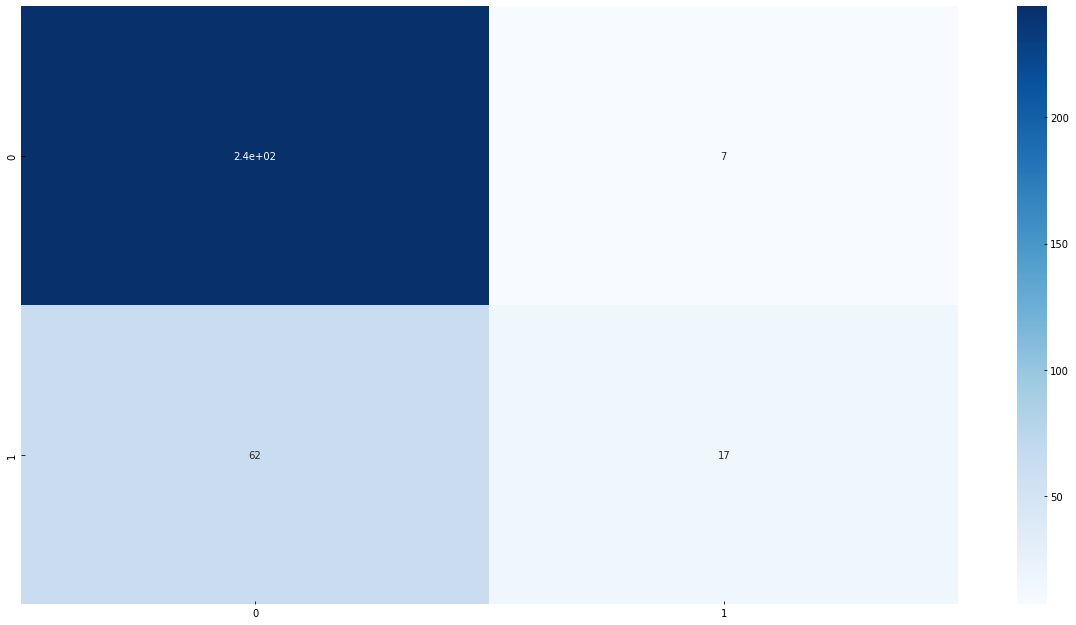

In [28]:
print("Matriz de confusión NV29")
matriz_29=confusion_matrix(yTest_29,yPredict_29)
print(matriz_29)
sns.heatmap(matriz_29,annot=True,cmap="Blues")

Matriz de confusión NV35
[[250   3]
 [ 68  18]]


<AxesSubplot:>

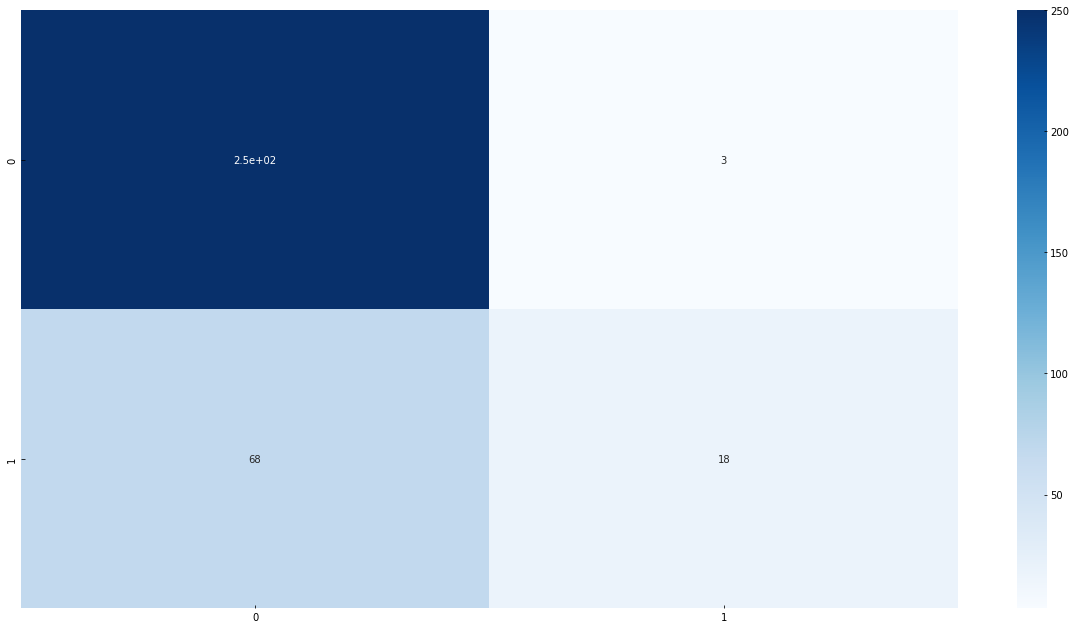

In [29]:
print("Matriz de confusión NV35")
matriz_35=confusion_matrix(yTest_35,yPredict_35)
print(matriz_35)
sns.heatmap(matriz_35,annot=True,cmap="Blues")

In [32]:
precision_recall_fscore_support(yTest_29,yPredict_29,average=None)
etiquetas=["NO ZSN","ZSN"]
print(classification_report(yTest_29,yPredict_29,target_names=etiquetas))
print("Accuracy=",modelo_29.score(XTest_29,yTest_29))
print("\n--------------------------------------\n")
precision_recall_fscore_support(yTest_35,yPredict_35,average=None)
etiquetas=["NO ZSN","ZSN"]
print(classification_report(yTest_35,yPredict_35,target_names=etiquetas))
print("Accuracy=",modelo_35.score(XTest_35,yTest_35))

              precision    recall  f1-score   support

      NO ZSN       0.80      0.97      0.88       251
         ZSN       0.71      0.22      0.33        79

    accuracy                           0.79       330
   macro avg       0.75      0.59      0.60       330
weighted avg       0.78      0.79      0.75       330

Accuracy= 0.7909090909090909

--------------------------------------

              precision    recall  f1-score   support

      NO ZSN       0.79      0.99      0.88       253
         ZSN       0.86      0.21      0.34        86

    accuracy                           0.79       339
   macro avg       0.82      0.60      0.61       339
weighted avg       0.80      0.79      0.74       339

Accuracy= 0.7905604719764012


In [35]:
export_graphviz(modelo_29,out_file="arbol_29.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)
export_graphviz(modelo_35,out_file="arbol_35.dot",class_names=etiquetas,feature_names=caracteristicas,impurity=False,filled=True)

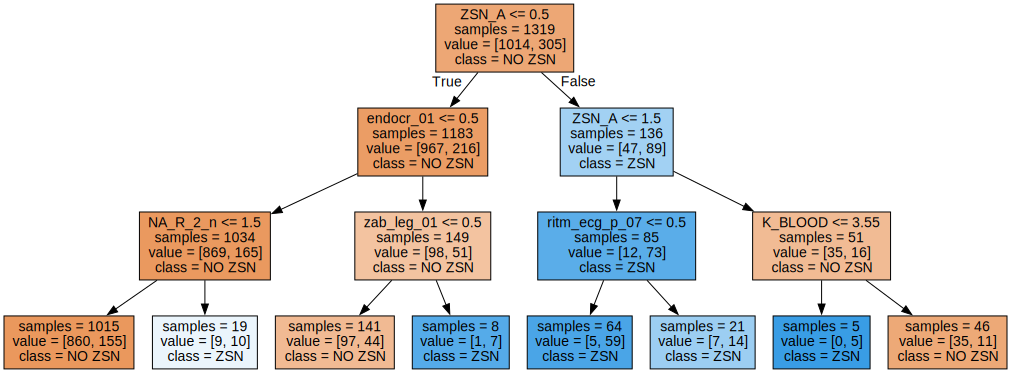

In [36]:
with open("arbol_29.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

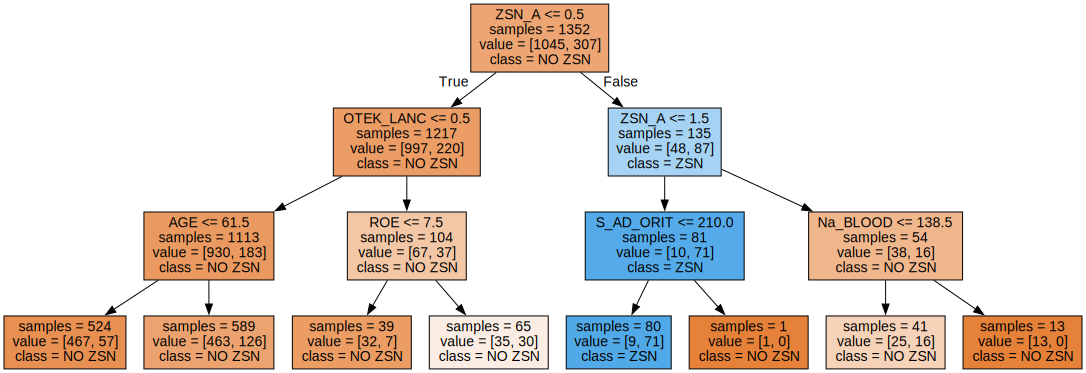

In [37]:
with open("arbol_35.dot") as f:
  dot_graph=f.read()
graphviz.Source(dot_graph)

115


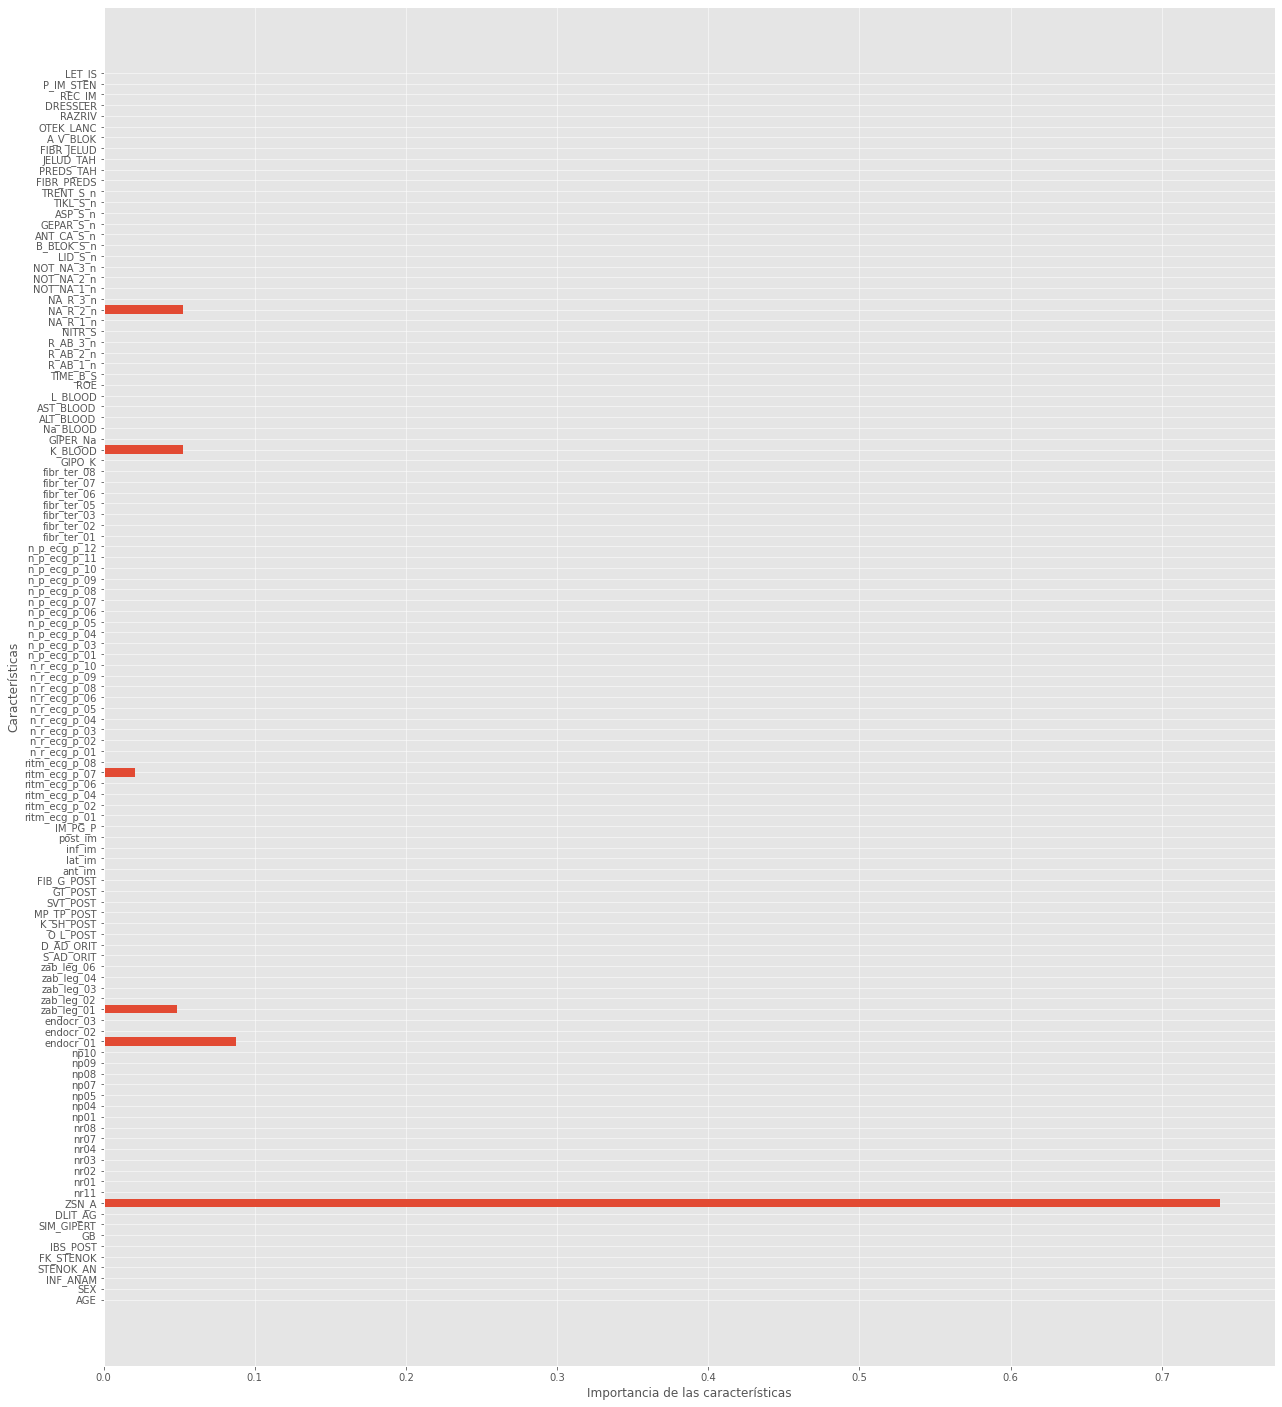

In [38]:
numeroCaracteristicas=Xn_29.shape[1]
print(numeroCaracteristicas)
plt.style.use('ggplot')
plt.figure(figsize=(21,25))
plt.barh(range(numeroCaracteristicas),modelo_29.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

115


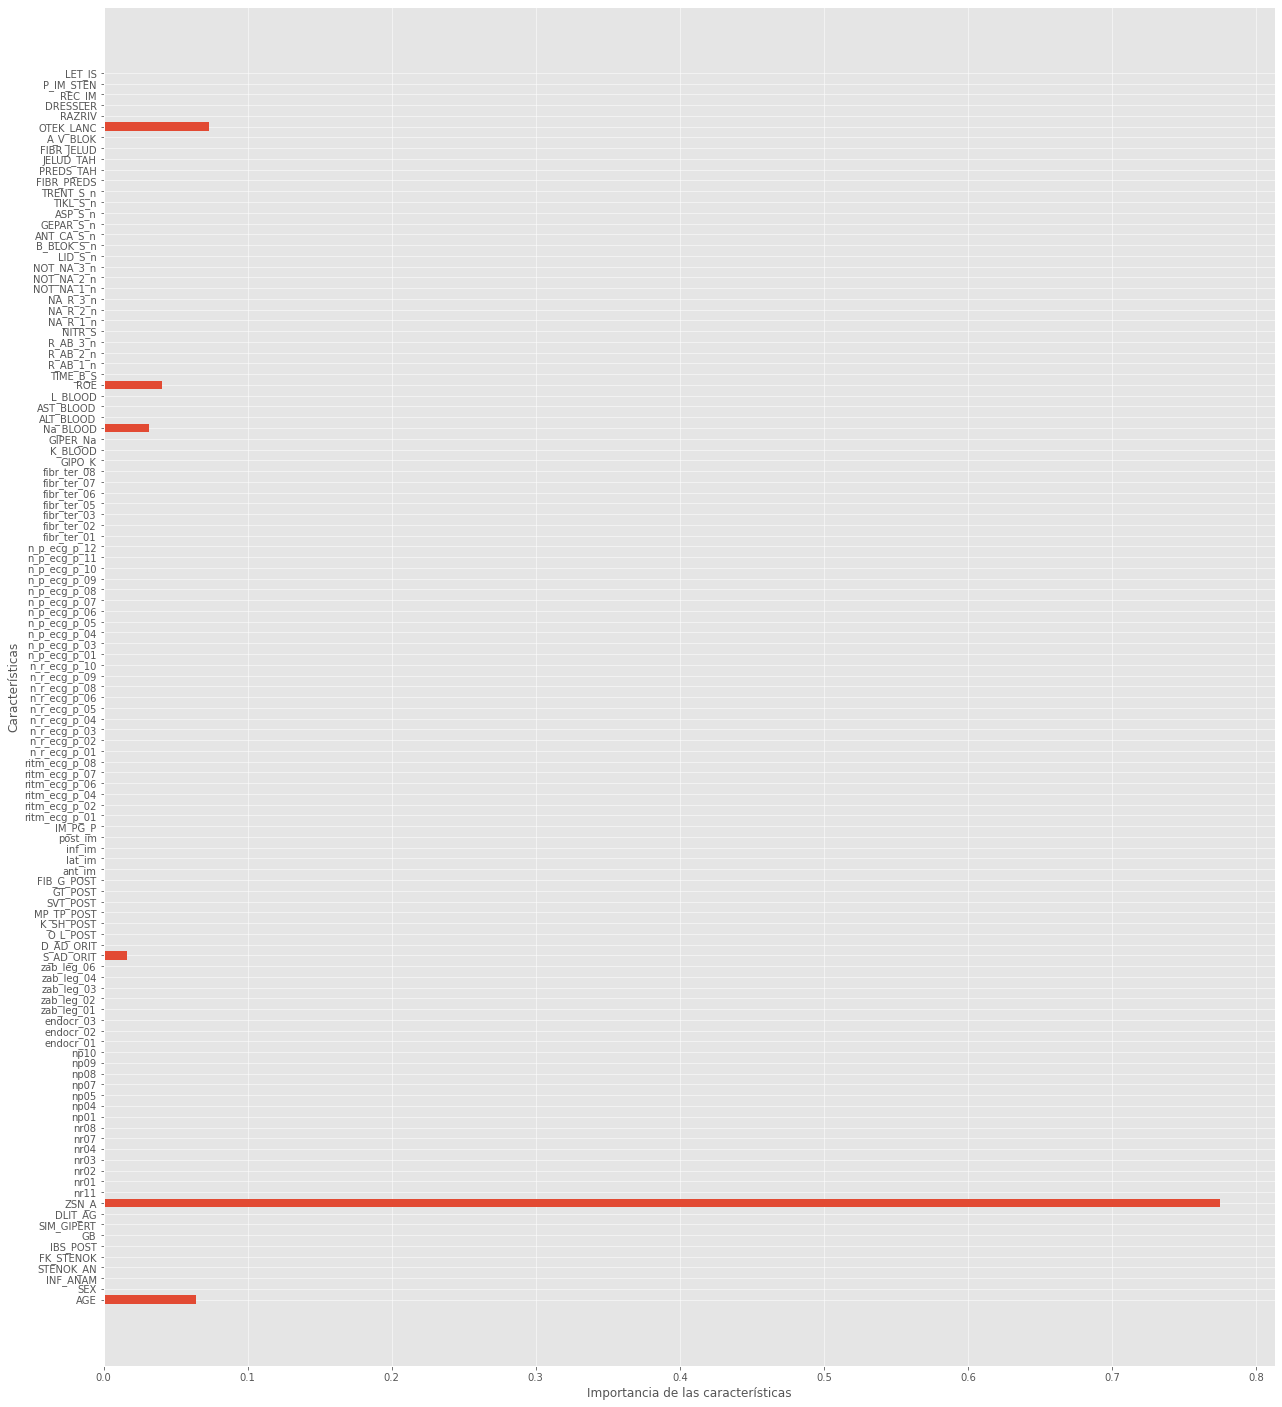

In [39]:
numeroCaracteristicas=Xn_35.shape[1]
print(numeroCaracteristicas)
plt.style.use('ggplot')
plt.figure(figsize=(21,25))
plt.barh(range(numeroCaracteristicas),modelo_35.feature_importances_)
plt.yticks(np.arange(numeroCaracteristicas),caracteristicas)
plt.xlabel("Importancia de las características")
plt.ylabel("Características")
plt.show()

In [41]:
model_score_29 = cross_val_score(modelo_29,XTest_29,yTest_29,scoring="accuracy",cv = 4).mean()
print("accuracy validación cruzada:", model_score_29)
print("Metrics for 29")
print("Accuracy: ",metrics.accuracy_score(yTest_29,yPredict_29))
print("F1Score: ",metrics.f1_score(yTest_29,yPredict_29))
print("Recall: ",metrics.recall_score(yTest_29,yPredict_29))
print("Precision: ",metrics.precision_score(yTest_29,yPredict_29))
print("\n--------------------------------------\n")
model_score_35 = cross_val_score(modelo_35,XTest_35,yTest_35,scoring="accuracy",cv = 4).mean()
print("accuracy validación cruzada:", model_score_35)
print("Metrics for 35")
print("Accuracy: ",metrics.accuracy_score(yTest_35,yPredict_35))
print("F1Score: ",metrics.f1_score(yTest_35,yPredict_35))
print("Recall: ",metrics.recall_score(yTest_35,yPredict_35))
print("Precision: ",metrics.precision_score(yTest_35,yPredict_35))

accuracy validación cruzada: 0.7575668527769616
Metrics for 29
Accuracy:  0.7909090909090909
F1Score:  0.3300970873786408
Recall:  0.21518987341772153
Precision:  0.7083333333333334

--------------------------------------

accuracy validación cruzada: 0.7610994397759103
Metrics for 35
Accuracy:  0.7905604719764012
F1Score:  0.33644859813084116
Recall:  0.20930232558139536
Precision:  0.8571428571428571


In [43]:
scores = cross_val_score(modelo_29, Xn_29, yn_29, cv=5,scoring='f1')
print(scores)
print(scores.mean())
print("\n--------------------------------------\n")
scores = cross_val_score(modelo_35, Xn_35, yn_35, cv=5,scoring='f1')
print(scores)
print(scores.mean())

[0.65116279 0.5982906  0.08791209 0.20689655 0.20224719]
0.34930184392714686

--------------------------------------

[0.671875   0.57627119 0.08602151 0.2027027  0.23300971]
0.3539760206515178
